In [29]:
import numpy as np
from sklearn import cluster, manifold, metrics
import matplotlib.pyplot as plt

np.random.seed(0)

classes=['human', 'mechanical', 'nature', 'animal']
embeddings = ['vgg', 'clap', 'pann']

nb_elts = 40
nb_classes = 4
nb_elts_per_class = int(nb_elts/nb_classes)

fad_true = np.ones((nb_elts, nb_elts))
labels_true = np.zeros(nb_elts)

for k in range(nb_classes): 
    fad_true[k*nb_elts_per_class:(k+1)*nb_elts_per_class,k*nb_elts_per_class:(k+1)*nb_elts_per_class] = np.zeros((nb_elts_per_class, nb_elts_per_class))
    labels_true[k*nb_elts_per_class:(k+1)*nb_elts_per_class] = k

noise = np.random.randn(nb_elts, nb_elts)
  

fads = []
fads.append(noise)
fads.append(fad_true+1.5*noise)
fads.append(fad_true+.5*noise)

for fad_index, fad in enumerate(fads):
    fad = fad+fad.T
    fads[fad_index] = fad-np.min(fad)

# plt.imshow(fad_vgg)
# plt.show()

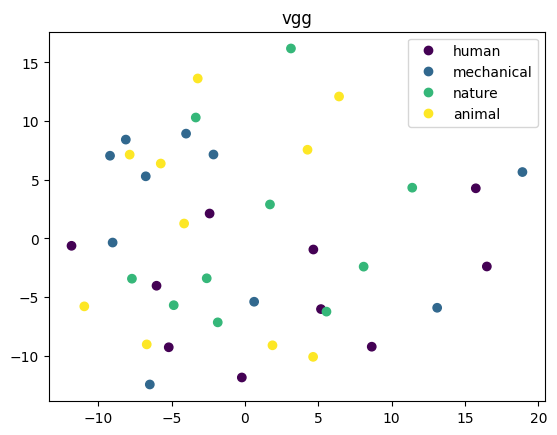

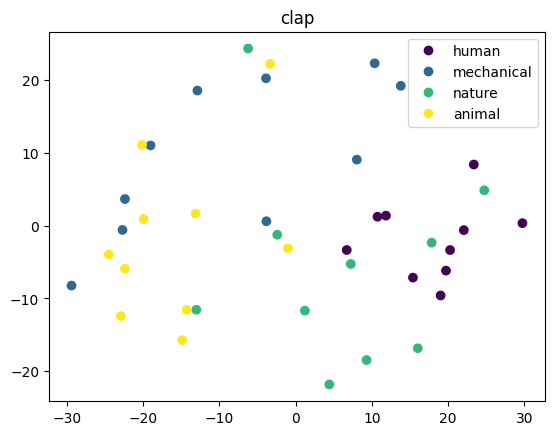

/Users/lagrange/opt/anaconda3/envs/ddsp/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/lagrange/opt/anaconda3/envs/ddsp/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/lagrange/opt/anaconda3/envs/ddsp/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/lagrange/opt/anaconda3/envs/ddsp/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expen

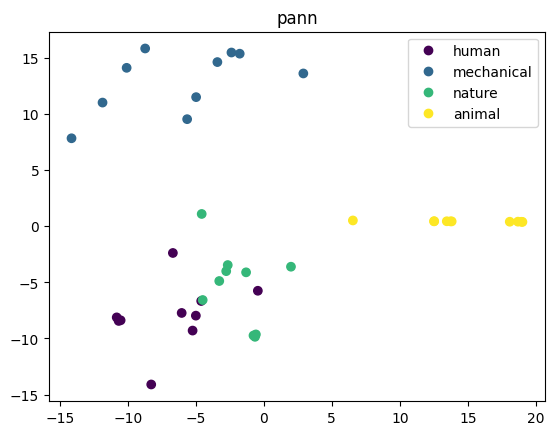

In [30]:
for fad_index, fad in enumerate(fads):
    projection = manifold.Isomap(n_components=2).fit_transform(fad)
    sc = plt.scatter(projection[:, 0], projection[:, 1], c=labels_true)
    plt.legend(handles=sc.legend_elements()[0], labels=classes)
    plt.title(embeddings[fad_index])
    plt.show()

In [31]:
for fad_index, fad in enumerate(fads):
    labels_pred = cluster.SpectralClustering(n_clusters=nb_classes, affinity='precomputed_nearest_neighbors').fit_predict(fad)
    ami = metrics.adjusted_mutual_info_score(labels_true, labels_pred)
    print(embeddings[fad_index]+' '+str(int(ami*100))+'%') 

vgg 2%
clap 45%
pann 100%
